# 複数量子ビットともつれ状態

単一の量子ビットは興味深いものではありますが、これらは個別では計算的に優位性をもたらすものではありません。ここでは複数の量子ビットに関する表現方法と、これらの量子ビットがどのように相互作用することができるかについて見ていきます。これまでに、2次元ベクトルを使用して1つの量子ビットに関する状態を表現することができることを学びました。今回は複数量子ビットの状態についてどのように表現することができるかについて見ていくことにします。

## 目次
1. [複数量子ビット状態の表現](#represent)    
    1.1 [練習問題](#ex1)
2. [複数量子ビット状態ベクトル上の単一量子ビットゲート](#single-qubit-gates)    
    2.1 [練習問題](#ex2)
3. [複数量子ビットゲート](#multi-qubit-gates)    
    3.1 [CNOTゲート](#cnot)  
    3.2 [もつれ状態](#entangled)    
    3.3 [もつれ状態の可視化](#visual)  
    3.4 [練習問題](#ex3)   


## 1. 複数量子ビット状態の表現 <a id="represent"></a>

単一の量子ビットは2つの状態を持つことができ、その状態は2つの複素振幅を持つことを見てきました。同様に、2量子ビットは4つの状態を持ちます。

`00` `01` `10` `11`

さらに、2量子ビットの状態を説明するには4つの複素振幅が必要です。これらの振幅を以下のように4次元ベクトルで表します。

$$ |a\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix} $$

観測に関するルールについても単一量子ビットの時と同様に機能します。

$$ p(|00\rangle) = |\langle 00 | a \rangle |^2 = |a_{00}|^2$$

また、規格化条件などについても同様です。

$$ |a_{00}|^2 + |a_{01}|^2 + |a_{10}|^2 + |a_{11}|^2 = 1$$

2つの分離された量子ビットがあった場合、テンソル積を使用することで2量子ビットの状態を説明することができます。

$$ |a\rangle = \begin{bmatrix} a_0 \\ a_1 \end{bmatrix}, \quad |b\rangle = \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} $$

$$ 
|ba\rangle = |b\rangle \otimes |a\rangle = \begin{bmatrix} b_0 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \\ b_1 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} b_0 a_0 \\ b_0 a_1 \\ b_1 a_0 \\ b_1 a_1 \end{bmatrix}
$$

さらに、同じルールに則り、テンソル積を使用して任意の数の量子ビット状態について説明することができます。3量子ビットの場合の例は以下の通りです。

$$ 
|cba\rangle = \begin{bmatrix} c_0 b_0 a_0 \\ c_0 b_0 a_1 \\ c_0 b_1 a_0 \\ c_0 b_1 a_1 \\
                              c_1 b_0 a_0 \\ c_1 b_0 a_1 \\ c_1 b_1 a_0 \\ c_1 b_1 a_1 \\
              \end{bmatrix}
$$

$n$個の量子ビットがある場合、$2^n$の複素振幅について記録する必要があります。これらのベクトルは量子ビットの数と共に指数関数的に大きくなります。これが多数の量子ビットを用いた量子コンピューターをシミュレートすることが大変困難である理由です。現代のラップトップは約20量子ビットのシミュレートは簡単にできますが、100量子ビットになると最も大きいスーパーコンピューターでも手に負えません。

回路の例を見てみましょう。

In [1]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram

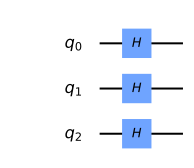

In [2]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw()

各量子ビットは$|+\rangle$の状態をとっており、ベクトルは以下のとおりとなります。

$$ 
|{+++}\rangle = \frac{1}{\sqrt{8}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \\
                              1 \\ 1 \\ 1 \\ 1 \\
              \end{bmatrix}
$$

In [3]:
# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

期待した結果が得られたことが確認できます。

### 1.1 練習問題:<a id="ex1"></a>

1.	次の量子ビットのテンソル積の(状態)ベクトルを書け。  
    a)	$|0\rangle|1\rangle$    
    b)	$|0\rangle|+\rangle$    
    c)	$|+\rangle|1\rangle$    
    d)	$|-\rangle|+\rangle$    
2.	状態を2つの別々の量子ビットとして記述せよ。
    $|\psi\rangle = \tfrac{1}{\sqrt{2}}|00\rangle + \tfrac{i}{\sqrt{2}}|01\rangle $
    

## 2. 複数量子ビット状態ベクトル上の単一量子ビットゲート<a id="single-qubit-gates"></a>

Xゲートは以下の行列で表現されます。

$$
X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$$

さらに、Xゲートは$|0\rangle$の状態に以下のように作用します。

$$
X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1\end{bmatrix}
$$

しかしながら、Xゲートが複数量子ビットベクトル内の量子ビットに対してどのような作用をするのかははっきりしません。幸運にもルールはかなり単純です。複数量子ビットの状態ベクトルを計算するのにテンソル積を使用したように、テンソル積を使用してこれらの状態ベクトルに作用する行列を計算することができます。例えば、以下の回路においては、

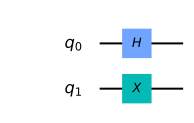

In [4]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

HとXによる同時演算はそれらのテンソル積を用いて表現可能です。

$$
X|q_1\rangle \otimes H|q_0\rangle = (X\otimes H)|q_1 q_0\rangle
$$

演算は以下の通りとなり、

$$
X\otimes H = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \otimes \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
                \\ 
                1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\end{bmatrix} = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 & 0 & 1 & 1 \\
                0 & 0 & 1 & -1 \\
                1 & 1 & 0 & 0 \\
                1 & -1 & 0 & 0 \\
\end{bmatrix}
$$

4次元状態ベクトル$|q_1 q_0\rangle$に適用することができます。表記がかなり煩雑になるため、以下のとおり簡略化した表記法がよく用いられます。

$$
X\otimes H = 
\begin{bmatrix} 0 & H \\
               H & 0\\
\end{bmatrix}
$$

手で計算する代わりにQiskitの`aer_simulator`を使用すると計算をしてくれます。Aer simulatorは、回路にある全てのゲートを乗算して量子回路全体を表現する一つのユニタリー行列にしてくれます。

In [5]:
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()

結果を見てみます：

In [6]:
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

1量子ビットのみにゲートを適用する場合（以下の回路など）、単位行列を使用してテンソル積を実行します。例：

$$ X \otimes I $$

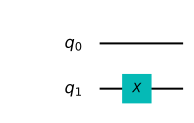

In [7]:
qc = QuantumCircuit(2)
qc.x(1)
qc.draw()

In [8]:
# Simulate the unitary
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

Qiskitが以下の通りテンソル積を計算したのが見て取れます。
$$
X \otimes I =
\begin{bmatrix} 0 & I \\
               I & 0\\
\end{bmatrix} = 
\begin{bmatrix} 0 & 0 & 1 & 0 \\
                0 & 0 & 0 & 1 \\
                1 & 0 & 0 & 0 \\
                0 & 1 & 0 & 0 \\
\end{bmatrix}
$$

### 2.1 練習問題: <a id="ex2"></a>

1. 次の一連のゲートにより作成される単一量子ビットユニタリー ($U$) を計算せよ。$U = XZH$ 結果の確認にはQisikitのAer simulatorを使用すること。
2. 上記の回路についてゲートを変更してみよ。テンソル積を計算し、Aer simulatorを用いて答え合わせをせよ。

**Note:** 本、ソフトウェア、ウェブサイトによって量子ビットの順序が異なる。これは、同じ回路のテンソル積は全く異なるもののように見えることとなり、頭痛の種になることがある。他の情報源を参照する場合は注意すること。

## 3. 複数量子ビットゲート <a id="multi-qubit-gates"></a>

複数量子ビットの状態について表現方法を知ることができたため、複数量子ビットがそれぞれどのように相互作用するかについて学ぶ準備ができました。重要な2量子ビットゲートはCNOTゲートです。

### 3.1 CNOTゲート <a id="cnot"></a>

このゲートは[計算の原子](../ch-states/atoms-computation.html)の章に出てきました。このゲートは条件付きゲートであり、1つ目の量子ビット（コントロール）が$|1\rangle$の場合に2つ目の量子ビット（ターゲット）にXゲートを適用する、というものです。このゲートは`q0`をコントロール、`q1`をターゲットとして以下のような回路として描画できます。

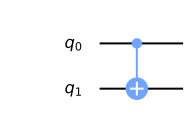

In [9]:
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)
# See the circuit:
qc.draw()

量子ビットが$|0\rangle$と$|1\rangle$の重ね合わせでない場合、このゲートはとても単純で直感的にわかりやすいです。古典の真理値表を使用できます。

| Input (t,c) | Output (t,c) |
|:-----------:|:------------:|
| 00          | 00           |
| 01          | 11           |
| 10          | 10           |
| 11          | 01           |

4次元状態ベクトルに従うと、どちらの量子ビットがコントロールでどちらがターゲットかにより、以下の2つの行列のいずれかになります。

$$
\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
                              0 & 1 & 0 & 0 \\
              \end{bmatrix}, \quad
\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 1 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
              \end{bmatrix}
$$

本、シミュレーター、論文によって量子ビットの順番は異なります。今回のケースでは、左の行列が上記回路のCNOTに相当します。この行列は状態ベクトルの$|01\rangle$と$|11\rangle$の振幅を交換します。

$$ 
|a\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix}, \quad \text{CNOT}|a\rangle = \begin{bmatrix} a_{00} \\ a_{11} \\ a_{10} \\ a_{01} \end{bmatrix} \begin{matrix} \\ \leftarrow \\ \\ \leftarrow \end{matrix}
$$

これまで古典的な状態に対する作用について見てきましたが、今度は重ね合わせ状態の量子ビットに対しての作用を見ていきましょう。1量子ビットを$|+\rangle$の状態にします。

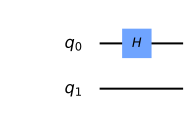

In [10]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.draw()

In [11]:
# Let's see the result:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

これは期待通りに$|0\rangle \otimes |{+}\rangle = |0{+}\rangle$の状態を作ります。

$$
|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |01\rangle)
$$

CNOTゲートを適用するとどうなるか見てみましょう。

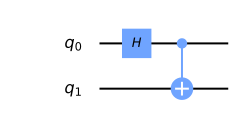

In [12]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw()

In [13]:
# Let's get the result:
qc.save_statevector()
qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

以下の状態が得られます。

$$
\text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$ 

これはもつれ状態になっており、大変興味深いです。もつれ状態については次節に進みましょう。

### 3.2 もつれ状態 <a id="entangled"></a>

前節では以下の状態を作ることができることを見ました。:

$$
\tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$ 

これはベル状態として知られています。この状態は、50%の確率で$|00\rangle$の状態が観測され、50%の確率で$|11\rangle$の状態が観測されます。最も興味深いことに、$|01\rangle$または$|10\rangle$が観測される確率は**0%** です。このことは、Qiskitで確認することができます。

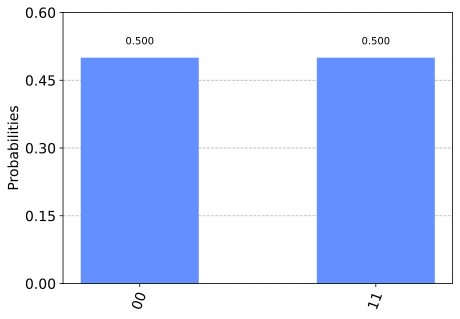

In [14]:
plot_histogram(result.get_counts())

この結合された状態は、2つの別々の量子ビット状態として記述することはできません。このことには興味深い示唆があります。量子ビットが重ね合わせ状態にあるにも関わらず、1つの量子ビットを観測するともう1つの量子ビットの状態が得られると同時に重ね合わせ状態がなくなります。例として、一番上の量子ビットを観測して$|1\rangle$の状態が得られたとすると、2つの量子ビットの状態は以下のように変化します。

$$
\tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \quad \xrightarrow[]{\text{measure}} \quad |11\rangle
$$

2つの量子ビットを数光年の距離に離したとしても、1つの量子ビットに関する観測はもう1つの量子ビットに対して影響を及ぼしているようにみえます。この[不気味な遠隔作用](https://en.wikipedia.org/wiki/Quantum_nonlocality) は20世紀初期に非常に多くの物理学者を悩ませました。

測定結果はランダムであり、一方の量子ビットの観測結果は、もう一方の量子ビットの操作の影響を受け**ない**ことに注意することが重要です。 このため、共量子もつれ状態を使用して通信をする方法は**ありません**。 これは、通信不可能定理[1]として知られています。

### 3.3 もつれ状態の可視化<a id="visual"></a>

この状態は2つの別々の量子ビット状態として書けないことがわかりましたが、このことは、別々のブロッホ球に状態をプロットしようとすると、情報が失われることも意味します。

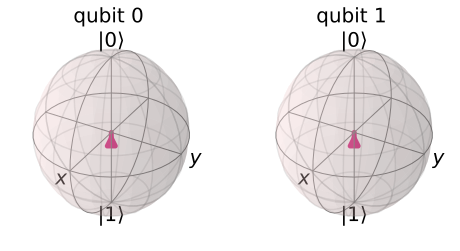

In [15]:
plot_bloch_multivector(final_state)

以前の章でどのようにブロッホ球を定義したかを考えると、Qiskitがこのようにもつれた量子ビットでどのようにブロッホベクトルを計算するのかさえ、はっきりしないかもしれません。単一量子ビットの場合、ある軸に沿ったブロッホベクトルの位置は、その基底で測定したときの期待値にうまく対応します。これをブロッホベクトルのプロットの**ルール**とすると、上のような結論になります。このことは、特定の測定が保証されるような単一の量子ビットの測定基底が存在**しない**ことを示しています。これは、常に単一の量子ビットの基底を選ぶことができる単一量子ビット状態とは対照的です。このように個々の量子ビットを見ていると、量子ビット間の相関の重要な効果を見逃してしまいます。異なるもつれ状態を区別することができないのです。例えば、2つの状態

$$\tfrac{1}{\sqrt{2}}(|01\rangle + |10\rangle) \quad \text{and} \quad \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

は、測定結果が異なる全く異なる状態であるにもかかわらず、この別々のブロッホ球の上ではどちらも同じに見えます。

この状態ベクトルを他にどのように可視化すればよいのでしょうか？この状態ベクトルは単純に4つの振幅（複素数）の集まりであり、これを画像にうつす方法は無限にあります。そのような可視化の1つが「Q-sphere」で、ここでは各振幅を球の表面上のブロブで表現しています。ブロブの大きさは振幅の大きさに比例し、色は振幅の位相に比例します。$|00\rangle$と$|11\rangle$の振幅は等しく、他の振幅はすべて0です。

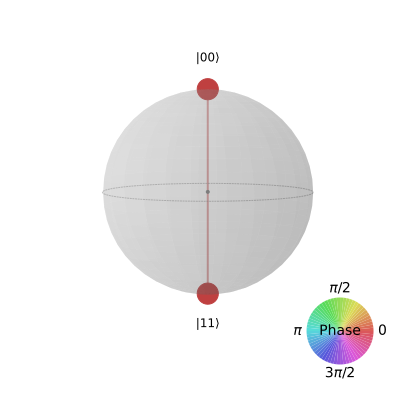

In [16]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(final_state)

ここでは、量子ビットの間の相関を明確に見ることができます。Q-sphereの形は重要ではなく、単にブロブを並べるのにいい方法であるにすぎません。状態の`0`の個数はZ軸上の状態の位置に比例するので、ここでは$|00\rangle$の振幅は球の上の極にあり、$|11\rangle$の振幅は球の下の極にあることが分かります。

### 3.4 練習問題: <a id="ex3"></a>
1. 以下のベル状態を作り出す量子回路を作成せよ。 $\tfrac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$.
   状態ベクトルシミュレーターを使用して結果を検証せよ。

2. 設問1にて作成した回路は状態$|00\rangle$を$\tfrac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$に変換するものである。この回路のユニタリー行列をQiskitシミュレータを使用して計算せよ。このユニタリー行列が正しい変換を行えることを検証せよ。

3. 状態ベクトルを視覚的に表現する他の方法について考えてみよ。各振幅の大きさと位相を読み取ることができる、興味深い視覚化をデザインできるか？

## 4. 参考文献

[1] Asher Peres, Daniel R. Terno, _Quantum Information and Relativity Theory,_ 2004, https://arxiv.org/abs/quant-ph/0212023

In [15]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.14.2',
 'qiskit-aer': '0.5.2',
 'qiskit-ignis': '0.3.3',
 'qiskit-ibmq-provider': '0.7.2',
 'qiskit-aqua': '0.7.3',
 'qiskit': '0.19.6'}